<a href="https://colab.research.google.com/github/Punishmidha/Rangoli-Classification-By-VGG-16/blob/main/Copy_of_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Kerala = '/content/drive/MyDrive/Mpmc_Project/Kerala'
Andhra_Pradesh = '/content/drive/MyDrive/Mpmc_Project/Andhra_Pradesh'

In [ ]:
batch_size = 32
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #data augmentation or preprocessing options
)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Mpmc_Project",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
)


Found 1690 images belonging to 5 classes.


In [ ]:
# We are loading the VGG16 model without the top layer and specifying the input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# We can  Add custom output layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(720, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [ ]:
# We are creating a new model combining the base VGG16 and custom output layers
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    predictions = model.predict(img_data)
    class_indices = np.argmax(predictions, axis=1)
    class_probabilities = predictions[0]
    return class_indices, class_probabilities


In [ ]:
# Path to our test images
test_image_paths = [
    '/content/drive/MyDrive/Mpmc_Project/Kerala/0a4aa40b7afb5c219e0b3cfa443bbd63.jpg',
    '/content/drive/MyDrive/Mpmc_Project/Andhra_Pradesh/009027f8ab37cd897caf939fe6367f12.jpg',
    '/content/drive/MyDrive/Mpmc_Project/Kerala/0ab5062b2fba64e143462593d77cbf67.jpg'
]

In [ ]:
class_labels = ['Kerala', 'Andhra Pradesh']

1/1 [==============================] - 5s 5s/step


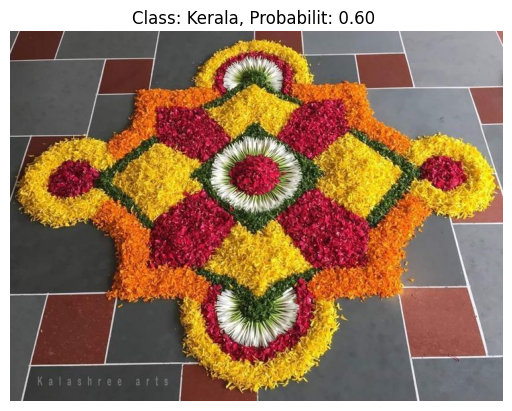

1/1 [==============================] - 0s 123ms/step


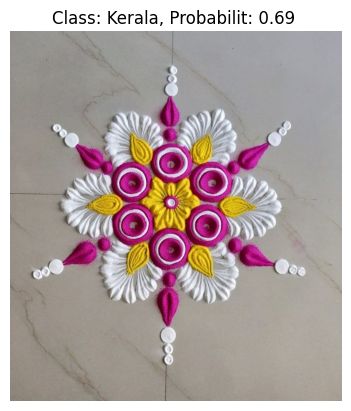

1/1 [==============================] - 0s 100ms/step


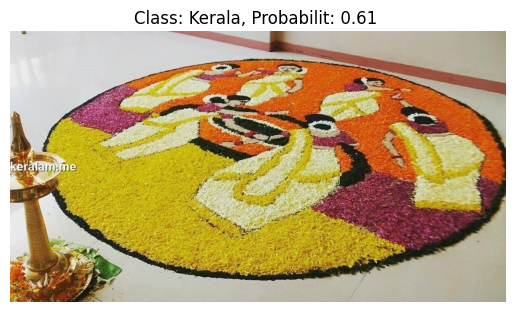

In [ ]:
for img_path in test_image_paths:
    class_indices, class_probabilities = classify_image(img_path)
    class_name = class_labels[class_indices[0]]
    probability = class_probabilities[class_indices[0]]

    plt.imshow(image.load_img(img_path))
    plt.title(f'Class: {class_name}, Probabilit: {probability:.2f} ')
    plt.axis('off')
    plt.show()

In [ ]:
import os

In [ ]:
len(os.listdir("/content/drive/MyDrive/Mpmc_Project/Andhra_Pradesh"))

672

In [ ]:
len(os.listdir("/content/drive/MyDrive/Mpmc_Project/Kerala"))

672